<style>
.todo {color: red;}
.tit { 
    text-align: left; 
    font-family: Arial Black; 
    font-weight: bold; 
    font-size: 50px; 
    color: #06cc70; 
    text-shadow: -1px 0 #000, 0 1px #000, 3px 0 #000, 0 -1px #000;
}
</style>

<h1 class="tit">Data storage and persistence</h1>
<span class="todo">TODO - Introduction</span>

Several data persistence alternatives have been proposed, in this notebook an attempt is made to create a wiki with documentation on this task.

# **1 - Storage methods**

## **1.1 - Using files**

## 1.2 - Using database

<style>.lib {color: green; font-weight: bold}</style>

As a first alternative we propose the database

To manage the database, a class <span class="lib">DatabaseHandler</span> has been implemented capable of being functional using different database engines using the abstract factory design pattern and guaranteeing the existence of a single instance of the class using the singleton pattern

Entity relationship diagram for the proposed database


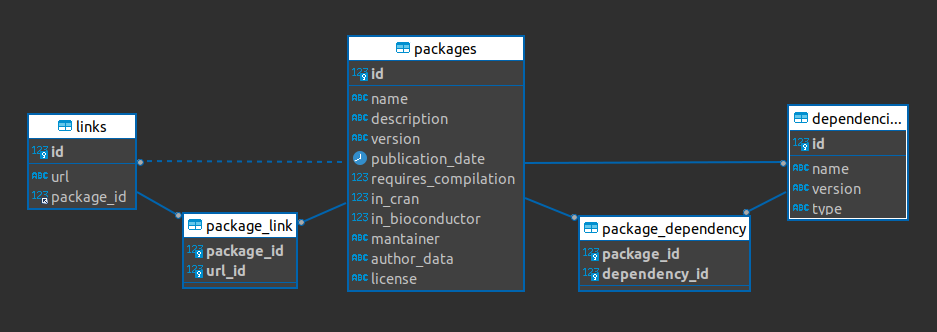

### 1.1.1 - MySQL

<style>.lib {color: green; font-weight: bold}</style>
For this task, the class <span class="lib">MySQLHandler</span> has been implemented.

That makes it easier for us to interact with the database.

In [3]:
from modules.database.mysql_handler import MySQLHandler

We configure the connection parameters as follows

In [4]:
# Dictionary with the database configuration
cnf = {}
cnf['user']         = "user"
cnf['password']     = "password"
cnf['host']         = "localhost"
cnf['database']     = "r_network"

Once ready, we instantiate the class and obtain the connection to the database

In [5]:
db_handler = MySQLHandler(cnf)

We can test the module and incidentally the structure of the database

#### MySQLHandler Funcionality test

We perform a basic test of getting the existing tables in the database

In [6]:
# Open the connection to the database
db_handler.open_connection()

# Get the tables from the database
tables = db_handler.execute_query("SHOW TABLES")

# show database tables
for table in tables:
    print("--------------------")
    print(table)

    # Obtener los campos de la tabla
    fields = db_handler.execute_query("SHOW COLUMNS FROM " + table[0])
    for field in fields:
        print("\t-",field)

db_handler.close_connection()


--------------------
('dependencies',)
	- ('id', b'int', 'NO', 'PRI', None, 'auto_increment')
	- ('name', b'varchar(255)', 'NO', '', None, '')
	- ('version', b'varchar(255)', 'NO', '', None, '')
	- ('type', b'varchar(255)', 'NO', '', None, '')
--------------------
('links',)
	- ('id', b'int', 'NO', 'PRI', None, 'auto_increment')
	- ('url', b'varchar(255)', 'NO', '', None, '')
	- ('package_id', b'int', 'NO', 'MUL', None, '')
--------------------
('package_dependency',)
	- ('package_id', b'int', 'NO', 'PRI', None, '')
	- ('dependency_id', b'int', 'NO', 'PRI', None, '')
--------------------
('package_link',)
	- ('package_id', b'int', 'NO', 'PRI', None, '')
	- ('url_id', b'int', 'NO', 'PRI', None, '')
--------------------
('packages',)
	- ('id', b'int', 'NO', 'PRI', None, 'auto_increment')
	- ('name', b'varchar(255)', 'NO', '', None, '')
	- ('description', b'text', 'YES', '', None, '')
	- ('version', b'varchar(255)', 'NO', '', None, '')
	- ('publication_date', b'date', 'NO', '', None, '')


<style>.lib {color: green; font-weight: bold}</style>
The <span class="lib">QueryBuilder</span> class has been implemented, which provides us with the necessary query for each case.

In [7]:
qb = db_handler.get_QueryBuilder()
qb.get_query("insert", "packages")

'INSERT INTO packages (name, description, version, publication_date, requires_compilation, in_cran, in_bioconductor, mantainer, author_data, license) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'

### 1.1.2 - SQLite

# 2 - Data structure Package
<style>.todo {color: red;}</style>
<span class="todo">TODO - Introduction</span>

In [8]:
from modules.package import Package

In [9]:
# Create a package object as package A3 and dump it
pkg_A3 = Package("A3")
pkg_A3.dump()

Name: A3
Description: None
Version: None
Publication date: None
Mantainer: None
Authors: None
Dependencies: None
Requires compilation:	None
In CRAN: True
In Bioconductor: None
Licenses: None
Links: None



In [8]:
# Opening the connection to the database
db_handler = MySQLHandler(cnf)
db_handler.open_connection()

# Building the package from the database and dumping it
pkg_A3.build_from_db(db_handler)
pkg_A3.dump()

# Closing the connection to the database
db_handler.close_connection()

Name: A3
Description:
789c658f410e83300c04bfe217f099f603866c20aa1347b601d1d73754bdf5e0c34aab99f563ef5d0a9c42559cb21a05cfbb7094b612b7348ee57adf293690c1770927cdd40da92c510e50d504f1899ea351119b2627d42e7a61000cc4b765e159304474148b9d45ae01bffe385f6be51768d1dad98a6b739a1127d028959c6168f113a9e87aeff7302eeb16e383932d4d1fecc9528e
Version: 1.0.0
Publication date: 2015-08-16

Mantainer: Scott Fortmann-Roe <scottfr@berkeley.edu>
Authors:
789c0b4ece2f295170cb2f2ac94dcccbd30dca4f0500407a06c6
Dependencies:
  - R (≥ 2.15.0) type: IMP
  - xtable, type: IMP
  - pbapply, type: IMP
Requires compilation:	False
In CRAN: True
In Bioconductor: False
Licenses:
GPL-2 | GPL-3 [expanded from: GPL (≥ 2)]
Links:
https://cran.r-project.org/package=A3

